# **Loan Default Prediction Project Overview**
This project aims to build a predictive model to identify high-risk loan applicants, helping financial institutions assess the likelihood of a loan default. The objective is to utilize historical loan application data, including personal details, loan amounts, and credit history, to predict whether an applicant will default or not. By doing so, financial institutions can make more informed decisions and mitigate the risk of loan defaults.

## 1. Data Collection and Preprocessing
* Dataset: The dataset contains applicant details (e.g., age, income, credit history) and loan information (loan amount, status).

In [1]:
import pandas as pd

# load the dataset
df=pd.read_csv("F:\Machine Learning all Algorithms\Previous Company Project\Loan Default Prediction\Loan_default.csv")

#display basic info
print(df.head())
print(df.info())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

### Data preprocessing

In [2]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop unique identifier column
df = df.drop(columns=['LoanID'])

# Handle missing values (if any) by filling with median for numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Apply one-hot encoding only to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define numerical columns for scaling
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Scale the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features and target variable
X = df.drop(columns=['Default'])
y = df['Default']


## 2. Exploratory Data Analysis (EDA)
* Perform EDA to understand patterns, distributions, and relationships within the data, which can provide insights into factors influencing loan default.

In [4]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')


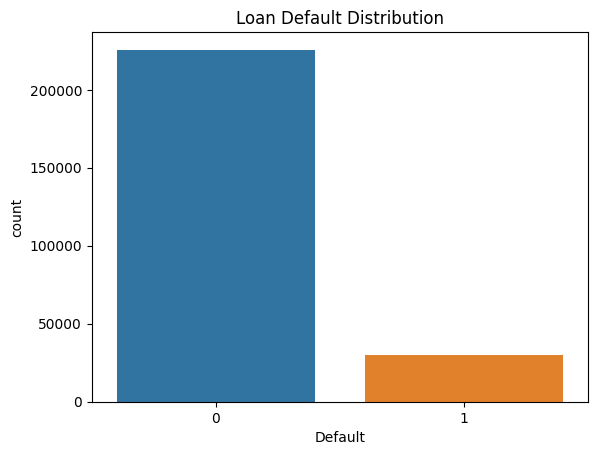

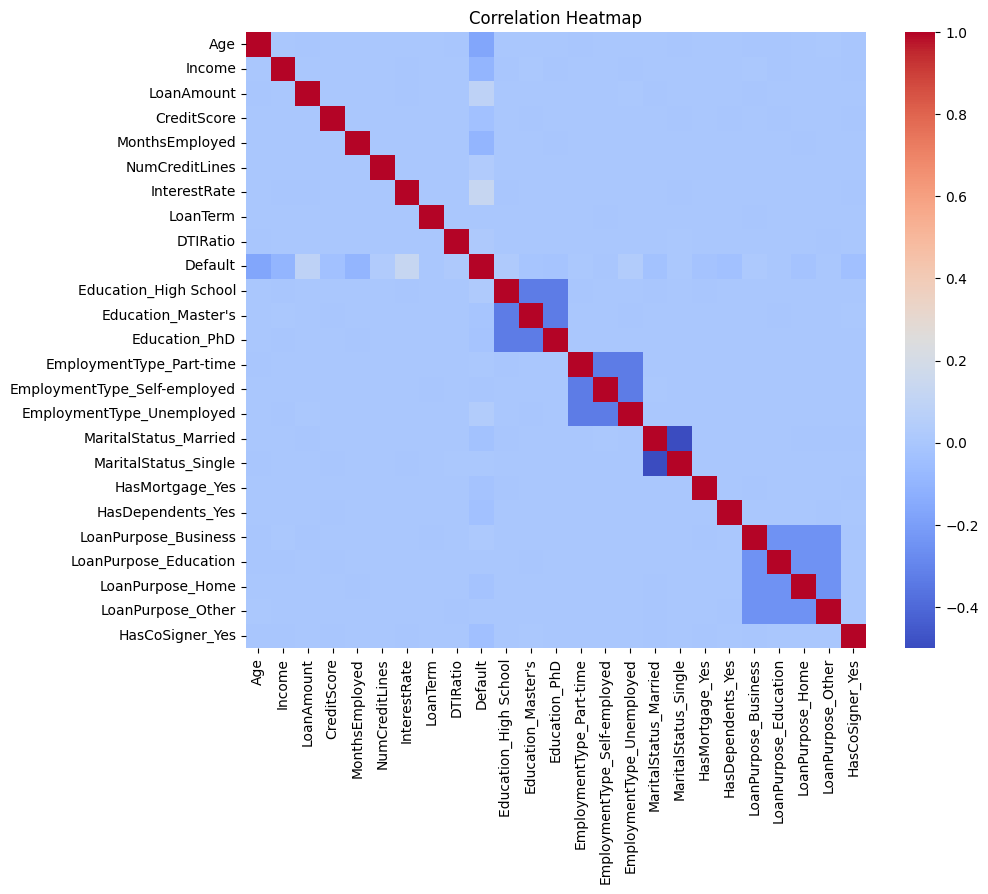

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='Default', data=df)
plt.title('Loan Default Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


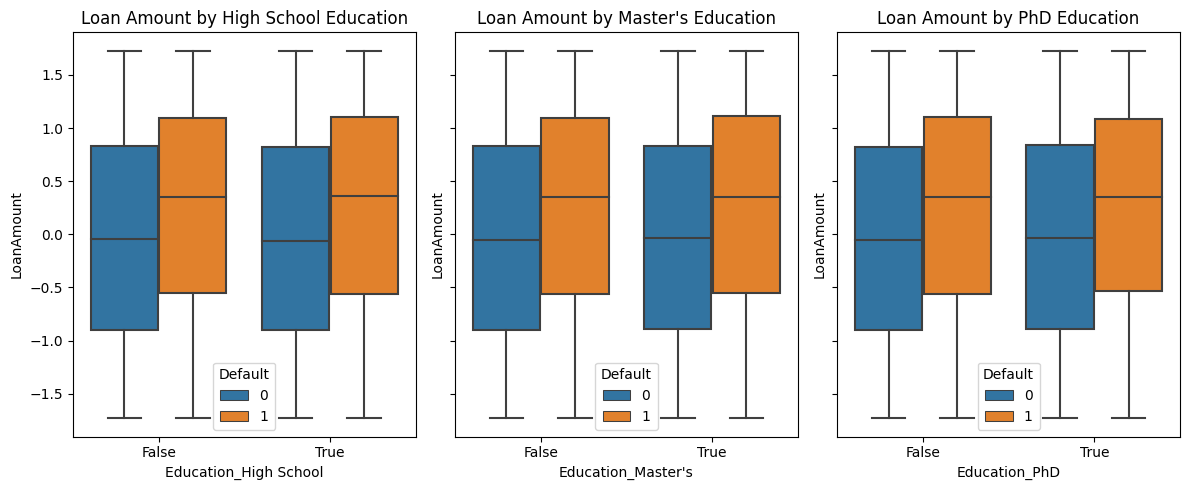

In [6]:
# Loan Amount by Education Level
# Education got split into ['Education_High School', 'Education_Master's', 'Education_PhD'] due to one hot encoding
# Create subplots for each education level

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each education level
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

sns.boxplot(x='Education_High School', y='LoanAmount', hue='Default', data=df, ax=axes[0])
axes[0].set_title('Loan Amount by High School Education')

sns.boxplot(x="Education_Master's", y='LoanAmount', hue='Default', data=df, ax=axes[1])
axes[1].set_title("Loan Amount by Master's Education")

sns.boxplot(x='Education_PhD', y='LoanAmount', hue='Default', data=df, ax=axes[2])
axes[2].set_title('Loan Amount by PhD Education')

plt.tight_layout()
plt.show()


### Explanation: Visualizing the target distribution helps assess class balance, which influences model selection. The heatmap shows correlations between features, helping identify highly related variables. Boxplots give insights into relationships, such as how loan amount varies by Education level and Default status.

## 3. Model Development
* Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

* Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

* Logistic Regression is used as a baseline classifier, where max_iter=1000 ensures convergence even with complex data.

In [9]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(reg, X_train, y_train, cv=5, scoring='roc_auc')
print("Mean CV AUC:", cv_scores.mean())

Mean CV AUC: 0.7469022978153423


* Cross-validation assesses the model’s robustness and helps avoid overfitting by averaging performance across different training subsets.

## 4. Model Evaluation
* Evaluate the model using metrics that provide insight into its predictive performance.


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.62      0.03      0.06      8924

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.50     76605
weighted avg       0.86      0.89      0.84     76605

confusion_matrix:
 [[67492   189]
 [ 8618   306]]
Test ROC-AUC Score: 0.74920163446907


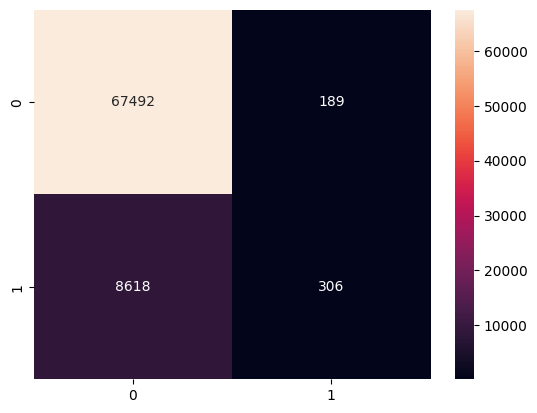

In [10]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predictions
y_pred=reg.predict(X_test)
y_pred_proba=reg.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')              # 'd' format specifier for integers

# ROC-AUC score
auc_score=roc_auc_score(y_test,y_pred_proba)
print("Test ROC-AUC Score:", auc_score)



## Initial Logistic Regression Model - Performance Analysis

The initial Logistic Regression model performed well in terms of overall accuracy but was inefficient at identifying defaulters. Below are the scores and key observations:

- **Accuracy**: 89%
- **Precision for Non-Defaulters (class 0)**: 0.89
- **Recall for Non-Defaulters**: 1.00
- **Precision for Defaulters (class 1)**: 0.62
- **Recall for Defaulters**: 0.03
- **ROC-AUC Score**: 0.749

### Confusion Matrix (Initial Model)
|               | Predicted Non-Defaulter | Predicted Defaulter |
|---------------|-------------------------|----------------------|
| Actual Non-Defaulter | 67,492                 | 189                  |
| Actual Defaulter     | 8,618                  | 306                  |

### Key Observations
- The model correctly classified 67,492 non-defaulters but misclassified 8,618 defaulters as non-defaulters.
- **Low Recall for Defaulters**: With a recall of 0.03, the model correctly identified only about 3% of true defaulters, indicating a heavy bias toward predicting non-defaulters.
- **Imbalance Impact**: Due to class imbalance (more non-defaulters than defaulters), the model favored predicting non-defaults, leading to poor performance in identifying defaults.


### To Identify the Deafulters we will use Logistic Regression with Class Weights



### Class Weight Adjustment in Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.73     76605

Confusion Matrix:
 [[45749 21932]
 [ 2759  6165]]
Test ROC-AUC Score:
 0.7492655549048479


<Axes: >

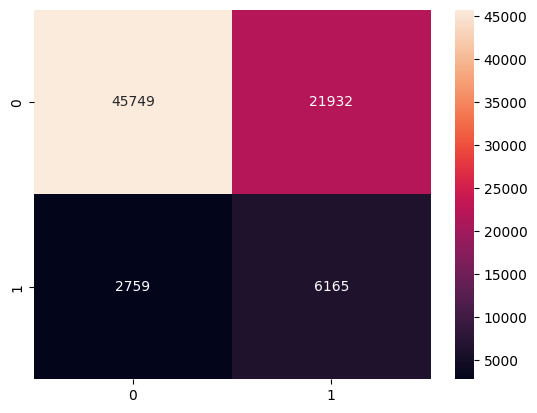

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initial Logistic Regression Model with balanced class weights
model=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC Score:\n", roc_auc_score(y_test, y_pred_proba))

# Plot the Confusion Matrix for Visbility
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

## Improved Model: Logistic Regression with Class Weights

To address the imbalance and improve defaulter identification, we implemented Logistic Regression with class weights, giving more focus to the minority class (defaulters). This approach seeks to improve recall for defaulters while maintaining precision for non-defaulters.

### Performance Metrics (Class Weights Adjusted)
- **Accuracy**: 68%
- **Precision for Non-Defaulters**: 0.94
- **Recall for Non-Defaulters**: 0.68
- **Precision for Defaulters**: 0.22
- **Recall for Defaulters**: 0.69
- **ROC-AUC Score**: 0.749

### Confusion Matrix (Class Weights Adjusted)
|               | Predicted Non-Defaulter | Predicted Defaulter |
|---------------|-------------------------|----------------------|
| Actual Non-Defaulter | 45,749                 | 21,932               |
| Actual Defaulter     | 2,759                  | 6,165                |

### Key Improvements
- **Higher Recall for Defaulters**: The recall for defaulters increased significantly to 0.69, identifying about 69% of true defaulters.
- **Balanced Approach**: The class weights adjustment improved defaulter identification without entirely sacrificing accuracy for non-defaulters.

---

This improvement in recall for defaulters demonstrates that Logistic Regression with class weights is more effective for our goal of predicting defaults. The model now provides a better balance between correctly identifying both defaulters and non-defaulters.

## **5. Evaluation Metrics**
* Now that we've implemented Logistic Regression with class weights, we'll evaluate the model's performance with various metrics to confirm its effectiveness.

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.73     76605

Confusion Matrix:
 [[45749 21932]
 [ 2759  6165]]


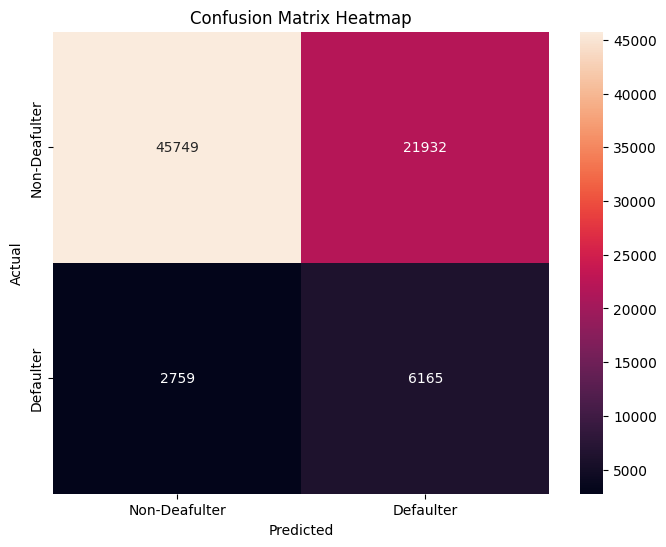

Test ROC-AUC Score:
 0.7492655549048479


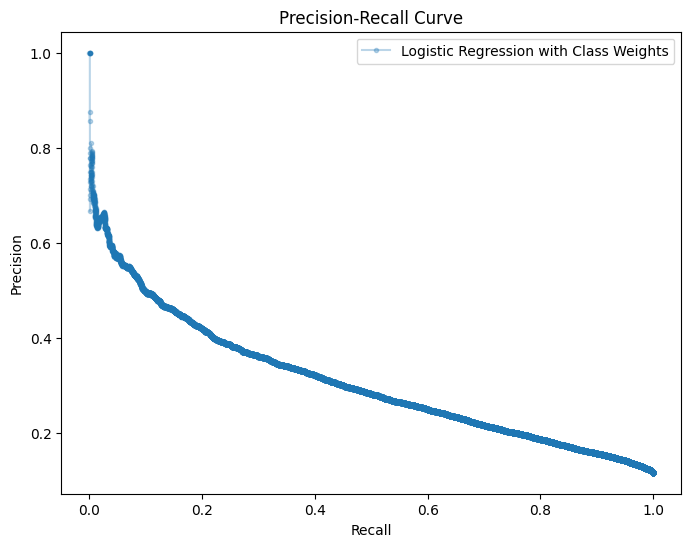

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions on the test set
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:, 1]

# Classificatio Report
print(" Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=["Non-Deafulter", "Defaulter"], yticklabels=["Non-Deafulter", "Defaulter"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ROC-AUC score
auc_score=roc_auc_score(y_test, y_pred_proba)
print("Test ROC-AUC Score:\n", auc_score)

# Precision-Recall Curve (fix unpacking error by adding thresholds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', alpha=0.3, label='Logistic Regression with Class Weights')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## **Project Conclusion**
- In this project, we developed a loan default prediction model using a logistic regression approach, initially focusing on non-defaulters as the target class. The initial model, while effective at predicting non-defaulters, had a high imbalance and poor performance in predicting defaulters. To address this, we applied class weights to improve prediction for the minority class (defaulters), resulting in more balanced performance.